# **IBM Data Science Professional Certificate Capstone Project**

## A. Problem Description

The problem attempted to solve in this project is the optimal location for a Spanish as a Second Language Academy in Madrid, Spain. In order to do so an analytical approach will be used with advanced machine learning, using clustering to solve the problem.
Madrid is the capital of Spain and as such it is a multicultural city where thousands of people come from all over the world to live and do business and also to study Spanish and learn about the culture.

## B. Data Presentation 
There are two databases that will be accessed to do this project:     
    1.  Foursqure API: accesed via Python and used to obtain the most common venues per neighbourhood in the city and to understand where people might be interested to attend Spanish clasess.        
    2.  Madrid City Hall's We protal. The data provided is in excel format and contains valuable information regarding the inmigrant information per country and nationality in Madrid. 

## C. Target Audience 

This project is for both inmmigrants and tourists that want to learn spanish this is why there will be a cross validation between the inmigrants and where they live and the most popular places in Madrid 

## D. Data Visualization

In [1]:
import pandas as pd 


In [11]:
data = pd.read_excel('C4210618.xls', sheet_name = 'C4210618', skiprows = 12)

In [14]:
data.head()

,Country of Procedence,Total Ciudad de Madrid,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,...,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,...,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,...,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,...,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,...,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,...,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0


In [13]:
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.columns = ['Country of Procedence', 'Total Ciudad de Madrid', 'Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas']
data.to_csv('Madrid Neighborhoods.csv')
data.head(25)

,Country of Procedence,Total Ciudad de Madrid,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,...,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,...,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,...,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,...,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,...,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,...,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0
5,Marruecos,21909.0,1101.0,390.0,184.0,322.0,280.0,1393.0,320.0,930.0,...,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0
6,Italia,20308.0,3030.0,1219.0,840.0,1817.0,1060.0,1194.0,1640.0,1195.0,...,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0
7,Perú,18829.0,563.0,521.0,253.0,612.0,419.0,965.0,567.0,805.0,...,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0
8,Paraguay,18682.0,364.0,474.0,237.0,521.0,657.0,3311.0,584.0,1024.0,...,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0
9,República Dominicana,17511.0,365.0,654.0,204.0,344.0,322.0,2272.0,443.0,589.0,...,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0


Example of data that can be extracted from the database: Bar plot with total  inmigrants from each country. 


In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
Total=data[['Country of Procedence', 'Total Ciudad de Madrid']]
Total.head()

,Country of Procedence,Total Ciudad de Madrid
0,Rumanía,45036.0
1,China,37276.0
2,Ecuador,23953.0
3,Venezuela,23359.0
4,Colombia,22618.0


In [42]:
Total.dropna(axis=0,how='any', inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
x=Total['Country of Procedence']
height=Total['Total Ciudad de Madrid']

<BarContainer object of 34 artists>

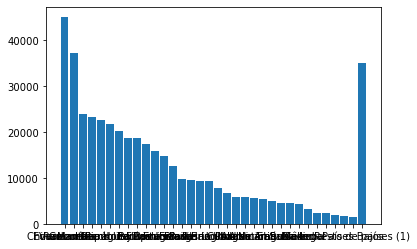

In [44]:
plt.bar(x,height)